<a href="https://colab.research.google.com/github/Codeguy225/Adult-Income-Project-/blob/main/Derek_Overton_Project_Two_Part_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult Income**

**Name:** **Derek Overton**

**Date:** **2/1/2023**

**Assignment:** **Project 2 Part 3**

# **Assignment Part 2:**
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
I- dentified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

Commit your file to your Github repository and submit the link below.

#**Assignment Part 3:**

**Note: You are not clustering your data for this assignment.**
- For this part of the project, you will continue your data exploration by:
 - Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
 - Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.
- Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the finding associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots).

Please submit the link to your GitHub Repository.

#**Assignment Part 4:**
You are now entering into the model development phase of the project!

- Ensure that you complete the appropriate pre-processing steps.
- Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).
- Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).
- Evaluate model performance with appropriate metrics for the model.
- Choose your "production" model and justify this decision.
- Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).
- Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.
- Commit your code to GitHub.

Submit the link to your GitHub repository.

##**Peliminary**

###Import Libaries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display = 'diagram')

## **1. Load and inspect the data**

### **Mount and Load the Data**

In [ ]:
# Mount Drive
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Load Data 
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Stack 2/Week 3 /DATA/Adult Income.csv')

### **Inspect the Data**

In [ ]:
# Review Data Information
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### **Set display Options** 

In [ ]:
# Renaming
df.rename(columns={"fnlwgt":"final_weight",
                    "educational-num":"educational_num",
                    'marital-status':'marital_status',
                    "capital-gain":"capital_gain",
                    "capital-loss":"capital_loss",
                    "hours-per-week":"hours_per_week",
                    "native-country":"native_country"}, inplace=True)

In [ ]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [ ]:
# Display the descriptive of all data
df.describe(include = 'all')

,age,workclass,final_weight,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- on my intinal review of the data, there are many missing values. There are 15 columns and 48842 rows. There also appear to be inconsistant values as well in the given data. We will deal with all these issues below.

## **2. Prepare/clean the data for exploratory analysis purposes.**

### **Duplicates**

In [ ]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [ ]:
# Drop duplicates 
df.drop_duplicates(inplace = True)

In [ ]:
# Recheck for duplicates 
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Inspect Column Datatypes for Errors**

In [ ]:
# Display the column names and datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
df.dtypes

age                 int64
workclass          object
final_weight        int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [ ]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   final_weight     48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational_num  48790 non-null  int64 
 5   marital_status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital_gain     48790 non-null  int64 
 11  capital_loss     48790 non-null  int64 
 12  hours_per_week   48790 non-null  int64 
 13  native_country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


###**Checking for Missing Values**

In [ ]:
df.isnull().sum()

age                0
workclass          0
final_weight       0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

###**Analysis of dataset**

In [ ]:
for i in df.columns:
    a = df.value_counts(i)
    print(f'\n\n\nvalues of {a}')




values of age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Length: 74, dtype: int64



values of workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
dtype: int64



values of final_weight
203488     21
190290     19
120277     19
125892     18
126569     18
           ..
163443      1
163393      1
163385      1
163380      1
1490400     1
Length: 28523, dtype: int64



values of education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Presch

so, from the above description

**coloumns which have "?" or missing values are :**

- workclass (categorical)
- occupation (categorical)
- native-country (categorical)

**coloumns which have "0" or missing values are :**

capital-gain
capital-loss

###**Handling missing values of categorical columns**


- Removing the columns (Capital-gain and capital-loss) because more than 90% entries are not filled i.e Zero.

In [ ]:
# Copy of DataFrame
dfc =df.copy()

In [ ]:
dfc = dfc.drop(['education'],axis=1)
dfc

,age,workclass,final_weight,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Replacing "?" with NaN
dfc.replace('?',np.nan,inplace=True)
dfc.isnull().sum()

age                   0
workclass          2795
final_weight          0
educational_num       0
marital_status        0
occupation         2805
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      856
income                0
dtype: int64

In [ ]:
# Performing SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer

SimpleImputer(strategy='most_frequent')

In [ ]:
# Review Copy of DataFrame
dfc.head()

,age,workclass,final_weight,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
print(dfc.dtypes)

age                 int64
workclass          object
final_weight        int64
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object


In [ ]:
# Using Replacement Method for Income <=50k, >50K
dfc.replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)

In [ ]:
dfc.head(10)

,age,workclass,final_weight,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,NaN,227026,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


- We have successfully replaced incom values [<=50K, >50K] with 0 and 1 in the same column


In [ ]:
# Split Data
X = dfc.drop('income',axis=1)
y = dfc['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [ ]:
#OneHotEncoder
ohe = OneHotEncoder(sparse= False, handle_unknown='ignore')

In [ ]:
#Standard Scaler
scaler = StandardScaler()

In [ ]:
#Instantiate the selectors 
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [ ]:
# Creating Transformer Two
transformer2 = RandomForestClassifier()
transformer2

RandomForestClassifier()

In [ ]:
#Forming pipelines
num_pipe = make_pipeline(scaler, imputer)
cat_pipe = make_pipeline(ohe)

In [ ]:
#Create Tuples
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [ ]:
#Instantiate preprocessor Transformers
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])

In [ ]:
# Createing Pipeline
pipe = Pipeline([('preprocessor', preprocessor), ('transformer2', transformer2)])
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
                ('transformer2', RandomForestClassifier())])

In [ ]:
# Fitting the Pipline
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
                ('transformer2', RandomForestClassifier())])

In [ ]:
# Prediction
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# Accuracy Check
accuracy_score(y_test,y_pred)

0.8616986391211674

In [ ]:
#F1 Score Check
f1_score(y_test, y_pred)

0.6843779232927969

##**Univariate Visuals** 

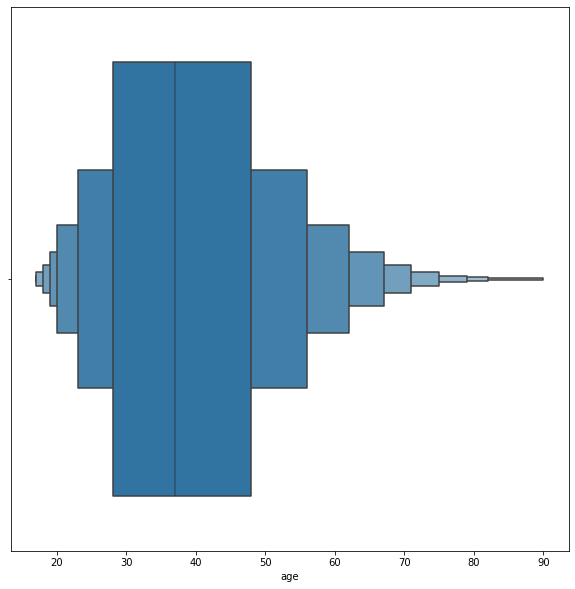

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.boxenplot(x="age", data=dfc)
plt.show()

<Figure size 1010x606 with 0 Axes>

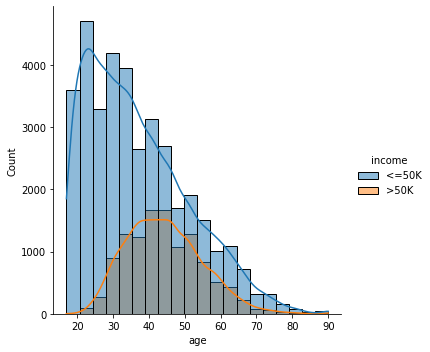

In [ ]:
plt.figure(figsize=(10,6),dpi=101);
ax=sns.displot(data=df,x='age',bins=20,kde=True,hue='income')
plt.show();

Observation:

- People who earn more than 50K tend to be between the ages of 35 and 55.
- Most people with incomes under 50K are between the ages of 17 and 35.

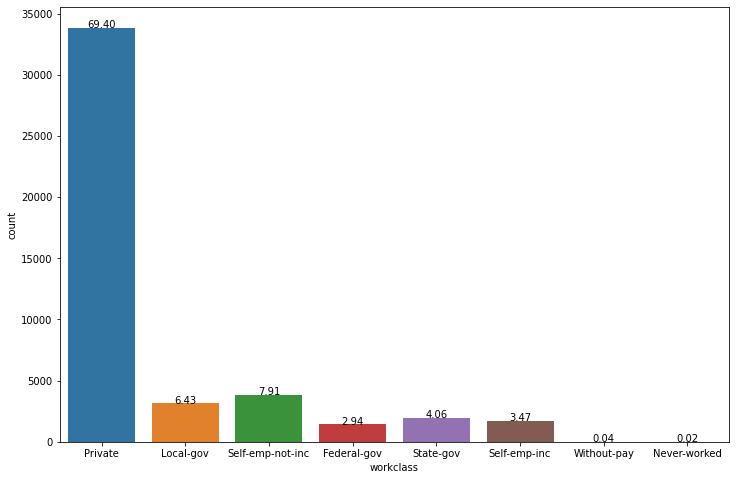

In [ ]:
# Workclass
plt.figure(figsize=(12,8))

total = float(len(dfc["income"]) )

ax = sns.countplot(x="workclass", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Summary distribution shows that:

- There are 8 unique categories present in the worclass attribute.
- Most of them belong to the private workclass(36705) i.e. 75.15%.
- without-pay and never-worked has minimum count in workclass attribute(less than 1%).
- There is huge imbalance in the categories of workclass attribute.

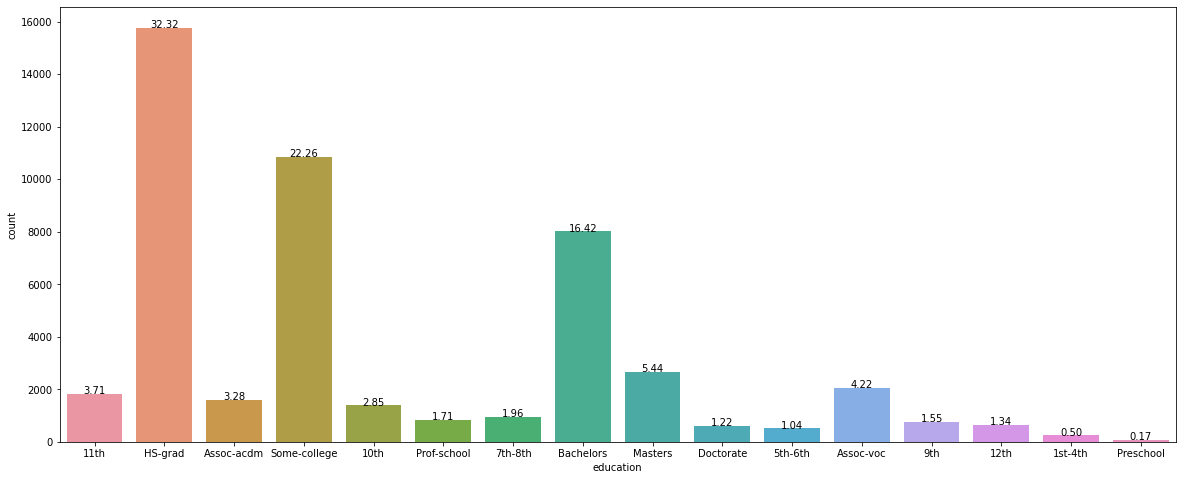

In [ ]:
# Education
plt.figure(figsize=(20,8))
total = float(len(df["income"]) )

ax = sns.countplot(x="education", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Description about distribution

- There are 16 unique categories present in the education attribute.
- Hs-grad has 32.32% of all the education attribute.
- HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
- Pre-school has minimum samples i.e. 83.

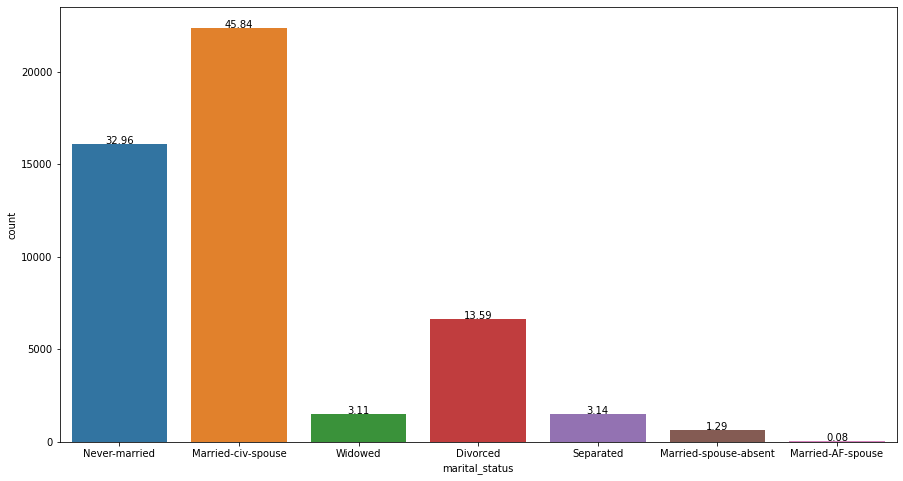

In [ ]:
# Marital Status
plt.figure(figsize=(15,8))
total = float(len(dfc) )

ax = sns.countplot(x="marital_status", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Description about distribution

- This marital-status attribute has 7 unique categories.
- Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
- Married-civ-spouse has maximum number of samples.
- Married-AF-spouse has minimum number of obs.

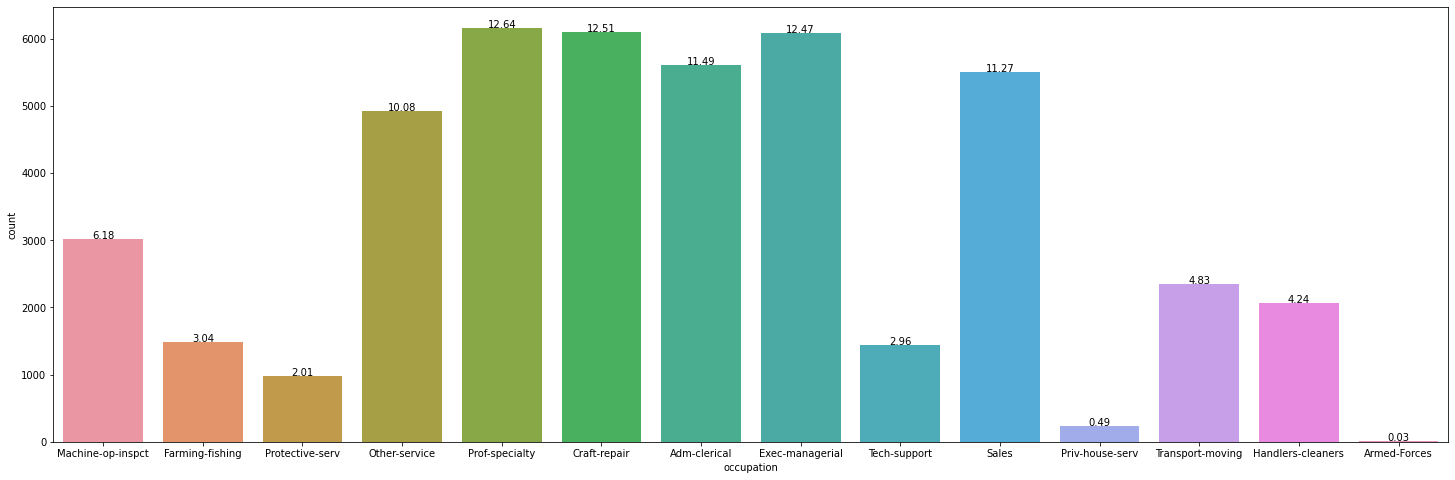

In [ ]:
# Occupation
plt.figure(figsize=(25,8))
total = float(len(dfc) )

ax = sns.countplot(x="occupation", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Description about distribution

- There are 14 unique categories present in the occupation attribute.
- Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
- Armed-Forces has minimum samples in the occupation attribute.

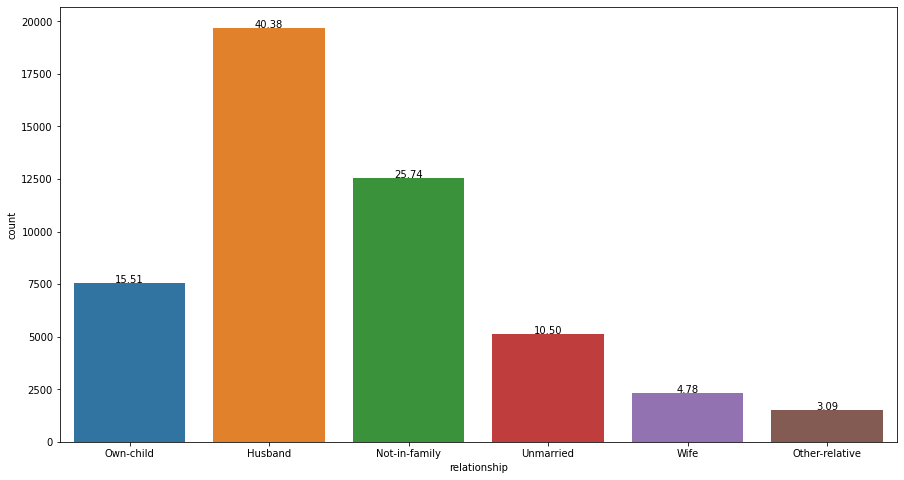

In [ ]:
# Relationship
plt.figure(figsize=(15,8))
total = float(len(dfc) )

ax = sns.countplot(x="relationship", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Description about distribution

- There are 6 unique categories in the relationship attribute.
- Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)

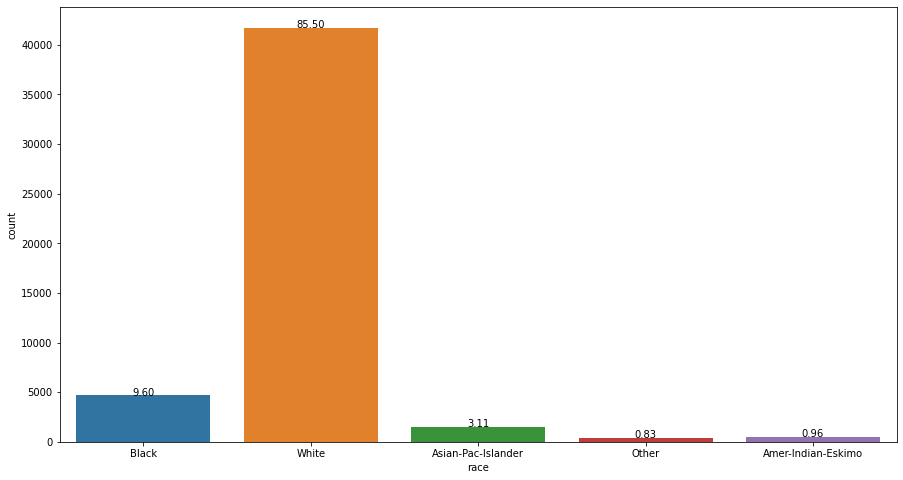

In [ ]:
# Race 
plt.figure(figsize=(15,8))
total = float(len(dfc) )

ax = sns.countplot(x="race", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:

- There are 5 unique categories in the race attribute.
- Most of them are "white" which is roughly 85.50%.
- This dataset is totally bias toward the "white" race.
- Second major race in the dataset is the "black" with just 9.59%.

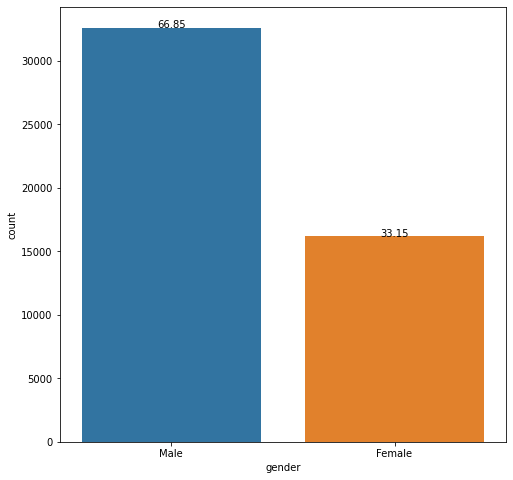

In [ ]:
# Gender
plt.figure(figsize=(8,8))
total = float(len(dfc) )

ax = sns.countplot(x="gender", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Description about distribution

This distribution explains that:

- Gender has 2 unique categories(male and female).
But the frequency of male(32650) is higher than the female(16192) categories.
- Distribution shows that this dataset is skewed toward the male with nearly 67%.

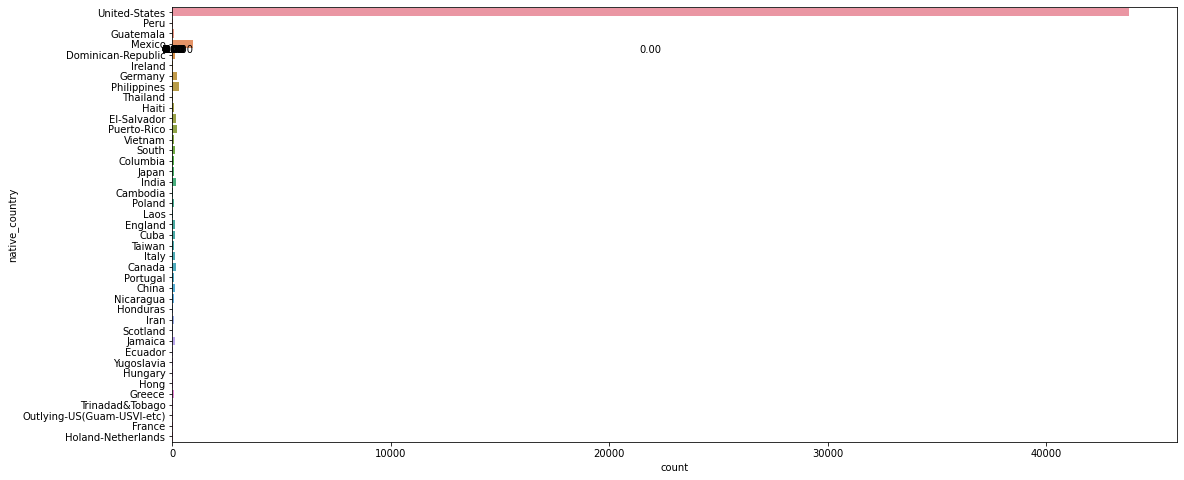

In [ ]:
# Native_Country
plt.figure(figsize=(18,8))
total = float(len(dfc) )

ax = sns.countplot(y="native_country", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:

- This dataset is taken from the US.
- As 91.5% of them have native country America and others are immigrants.

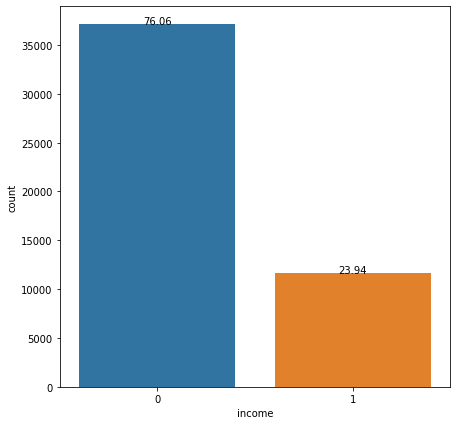

In [ ]:
# Income (Target variable)
plt.figure(figsize=(7,7))
total = float(len(dfc) )

ax = sns.countplot(x="income", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Description about distribution

This distibution says that:

- This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).

## **3. Correlation and Heat Maps**

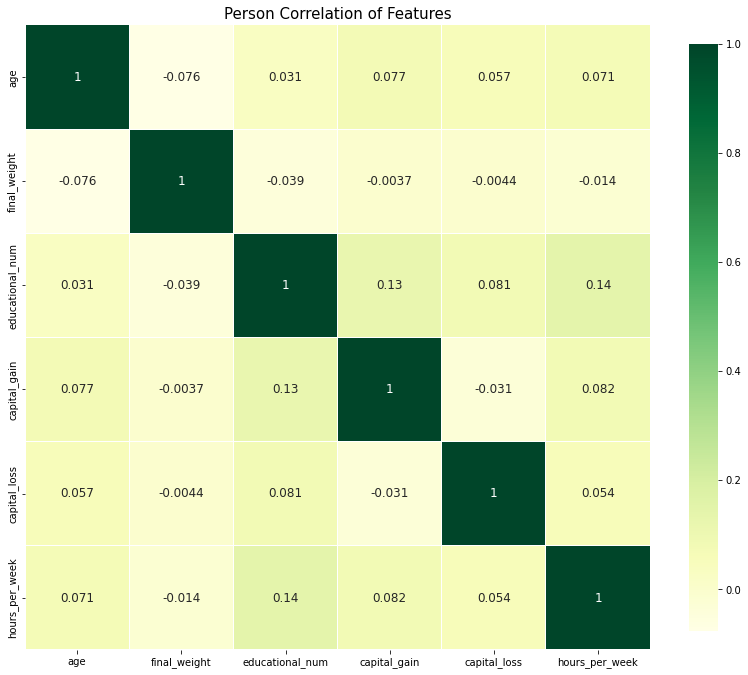

In [ ]:
def correlation_heatmap(dfc):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Person Correlation of Features', y=1.05, size=15)

correlation_heatmap(dfc)

##**4. Multivariate Visualizations**

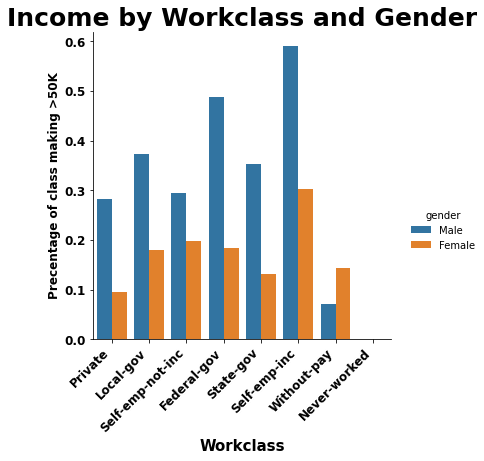

In [ ]:
sns.catplot(x="workclass", y="income", hue="gender", kind="bar", data=dfc, ci= None)
plt.xticks(rotation= 45, fontsize = 12, fontweight = 'bold', ha = 'right')
plt.yticks(fontsize = 12, fontweight= "bold")
plt.xlabel('Workclass',fontweight='bold', fontsize='15')
plt.ylabel('Precentage of class making >50K',fontweight='bold', fontsize='12')
plt.title('Income by Workclass and Gender',fontweight='bold', color = 'Black', fontsize='25');

The first Trend that is recognized is Income by Workclass and Gender
- The decimals represent the precentage of Workclass and Gender making greater than 50K.
- The trend is that most people are choosing to work as Self-emp-inc. This is most likely becaues they are business owners. 
- The females in the Without-pay category is beleived to earn income by other means such as child support and spousal support.


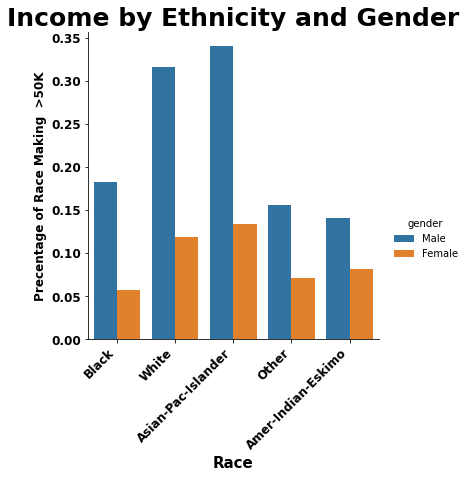

In [ ]:
sns.catplot(x="race", y="income", hue="gender", kind="bar", data=dfc, ci= None)
plt.xticks(rotation= 45, fontsize = 12, fontweight = 'bold', ha ='right')
plt.yticks(fontsize = 12, fontweight= "bold")
plt.xlabel('Race',fontweight='bold', fontsize='15')
plt.ylabel('Precentage of Race Making  >50K',fontweight='bold', fontsize='12')
plt.title('Income by Ethnicity and Gender',fontweight='bold', color = 'Black', fontsize='25');

The Second trend is income by ethnicity and gender
- The trend in this data set is that Asian -Pac-Islanders are earning a higher income than any other ethnicity.
- There is a large disparity between whites and blacks. 
- Black females seem to be the least precentage of people making greater than 50k.

##**Create Machine Models**



###**Logistic Regression Model**

In [ ]:
# Make a Logistic Regression instance
lr = LogisticRegression(random_state= 42)

In [ ]:
# Create pipeline
lr_pipe = make_pipeline(preprocessor, lr)

In [ ]:
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
%time
lr_pipe.fit(X_train,y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
# Make predictions using the training and testing data
train_pred = lr_pipe.predict(X_train)
test_pred = lr_pipe.predict(X_test)
train_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# evaluate the model
train_score = lr_pipe.score(X_train, y_train)
test_score = lr_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.8536018801923918
0.853090670601738


In [ ]:
#Classification Report
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9268
           1       0.75      0.62      0.68      2930

    accuracy                           0.86     12198
   macro avg       0.82      0.78      0.79     12198
weighted avg       0.85      0.86      0.85     12198



###**Use GridSearchCV**

In [ ]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
  (

In [ ]:
#Param grid
lr_param_grid = {'logisticregression__C': [1.0, 2.0],
                 'logisticregression__max_iter': [100, 500],
                 'logisticregression__penalty': ['l1','l2'], 
                 'logisticregression__solver': ['lbfgs','liblinear']}

pd.DataFrame(lr_param_grid).T

,0,1
logisticregression__C,1.0,2.0
logisticregression__max_iter,100,500
logisticregression__penalty,l1,l2
logisticregression__solver,lbfgs,liblinear


In [ ]:
%time
lr_pipe_gs = GridSearchCV(lr_pipe, lr_param_grid)
 
lr_pipe_gs.fit(X_train, y_train)
print('Best Logistic Regression Parameters:')
print(lr_pipe_gs.best_params_)
best_pipe = lr_pipe_gs.best_estimator_
print(f'Accuracy of best Logistic Regression model is: {best_pipe.score(X_test, y_test)}')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs
Best Logistic Regression Parameters:
{'logisticregression__C': 2.0, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Accuracy of best Logistic Regression model is: 0.853008689949172


##**Random Forest Model**

In [ ]:
# Make a Random Forest Instance 
rf = RandomForestClassifier(random_state = 42)

In [ ]:
# Create pipeline
rf_pipe = make_pipeline(preprocessor, rf)


In [ ]:
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
%%time
# Make predictions using the training and testing data
train_pred = rf_pipe.predict(X_train)
test_pred = rf_pipe.predict(X_test)
train_pred[:10]

CPU times: user 1.43 s, sys: 10.7 ms, total: 1.44 s
Wall time: 1.45 s


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# evaluate the model
train_score = rf_pipe.score(X_train, y_train)
test_score = rf_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.9999726716222125
0.8583374323659616


In [ ]:
#Classification Report
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9268
           1       0.75      0.62      0.68      2930

    accuracy                           0.86     12198
   macro avg       0.82      0.78      0.79     12198
weighted avg       0.85      0.86      0.85     12198



###**Use GridSearchCV**

In [ ]:
# Looking at some hyperparameters that seem tunable
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
  (

In [ ]:
#create and visualize our parameter grid
rf_param_grid = {'randomforestclassifier__max_depth': [1,2,3],
              'randomforestclassifier__min_samples_leaf': [3,15,20],
              'randomforestclassifier__min_samples_split': [2, 10, 100]}
 
pd.DataFrame(rf_param_grid).T

,0,1,2
randomforestclassifier__max_depth,1,2,3
randomforestclassifier__min_samples_leaf,3,15,20
randomforestclassifier__min_samples_split,2,10,100


In [ ]:
%%time
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid)
 
rf_pipe_gs.fit(X_train, y_train)
print('Best Randomforest Parameters:')
print(rf_pipe_gs.best_params_)
best_pipe = rf_pipe_gs.best_estimator_
print(f'Accuracy of best RandomForest model is: {best_pipe.score(X_test, y_test)}')

Best Randomforest Parameters:
{'randomforestclassifier__max_depth': 3, 'randomforestclassifier__min_samples_leaf': 20, 'randomforestclassifier__min_samples_split': 2}
Accuracy of best RandomForest model is: 0.7866863420232825
CPU times: user 2min 43s, sys: 482 ms, total: 2min 44s
Wall time: 2min 50s


##**KNN Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
%%time
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)
print(knn_train_preds)
print(knn_test_preds)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 1 0]
CPU times: user 36.6 s, sys: 9.53 s, total: 46.2 s
Wall time: 37.1 s


In [ ]:
#Evaulate the model
knn_train_score = knn_pipe.score(X_train, y_train)
knn_test_score = knn_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.9999726716222125
0.8583374323659616


In [ ]:
#Classification Report
report = classification_report(y_test, knn_test_preds)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      9268
           1       0.59      0.57      0.58      2930

    accuracy                           0.80     12198
   macro avg       0.73      0.72      0.73     12198
weighted avg       0.80      0.80      0.80     12198



In [ ]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
  (

In [ ]:
%time
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1,4),
              'kneighborsclassifier__p': range(1,2),
              'kneighborsclassifier__weights': ['balanced','uniform']}

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 17.4 µs


In [ ]:
%time
knn_pipe_gs = GridSearchCV(knn_pipe, knn_param_grid)
 
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.8255451713395638


##**KNN with PCA Model**

In [ ]:
# Create a transformer pipeline
pca_pipe= make_pipeline(preprocessor, PCA(n_components=.95), KNeighborsClassifier())

In [ ]:
pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb872887640>)])),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
%%time
pca_preds = pca_pipe.predict(X_test)
pca_preds

CPU times: user 10.8 s, sys: 2.43 s, total: 13.2 s
Wall time: 11.4 s


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
%%time
#Classification Report
report = classification_report(y_test, pca_preds)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      9268
           1       0.68      0.58      0.63      2930

    accuracy                           0.83     12198
   macro avg       0.78      0.75      0.76     12198
weighted avg       0.83      0.83      0.83     12198

CPU times: user 31.1 ms, sys: 14 µs, total: 31.1 ms
Wall time: 35.3 ms


##**Recommendation**

Overall, after paramter tuning on my Logistic and KNN Model, Random Forest appears to have the best model score (86%). The dataset is heavily white-based, it only can present the white-community not for the entire group in north america the dataset is collected in 1994, the level of influence for each feature maybe changed during these days.
More research and analysis on exploratory data analysis should be conducted to explore more detailed relationships (for example, classification analysis between income level and each occupation, regression analysis between age and capital-gain/loss etc). Although this Model has 86% accuracy score its perdictions are skewed.  My recommendation would be to get a more current dataset from which to build a model from that would be more reflective of today's society.  
